<a href="https://colab.research.google.com/github/Rohanrathod7/my-ml-labs/blob/main/13_Feature_Engineering_for_Machine_Learning_in_Python/03_Conforming_to_Statistical_Assumptions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 3. Conforming to Statistical Assumptions


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt
# Import confusion matrix and train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LogisticRegression, LinearRegression
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier




url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/13_Feature_Engineering_for_Machine_Learning_in_Python/dataset/Stock_Combined_DS_v10.csv"
# Read the CSV file

so_survey_df = pd.read_csv(url).apply(pd.to_numeric, errors='coerce')
display(so_survey_df.head())
print(so_survey_df.dtypes)

so_numeric_df = so_survey_df[["ConvertedSalary", "StackOverflowJobsRecommend", "Age", "Years Experience"]]
print(so_numeric_df.dtypes)

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,13,NaN,NaN
1,NaN,NaN,70841.0,NaN,NaN,7.0,NaN,38,9,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,8.0,NaN,45,11,NaN,NaN
3,NaN,NaN,21426.0,NaN,NaN,NaN,NaN,46,12,NaN,NaN
4,NaN,NaN,41671.0,NaN,NaN,8.0,NaN,39,7,NaN,NaN


SurveyDate                    float64
FormalEducation               float64
ConvertedSalary               float64
Hobby                         float64
Country                       float64
StackOverflowJobsRecommend    float64
VersionControl                float64
Age                             int64
Years Experience                int64
Gender                        float64
RawSalary                     float64
dtype: object
ConvertedSalary               float64
StackOverflowJobsRecommend    float64
Age                             int64
Years Experience                int64
dtype: object


### Data distributions

**What does your data look like? (I)**  
Up until now you have focused on creating new features and dealing with issues in your data. Feature engineering can also be used to make the most out of the data that you already have and use it more effectively when creating machine learning models.
Many algorithms may assume that your data is normally distributed, or at least that all your columns are on the same scale. This will often not be the case, e.g. one feature may be measured in thousands of dollars while another would be number of years. In this exercise, you will create plots to examine the distributions of some numeric columns in the so_survey_df DataFrame, stored in so_numeric_df.

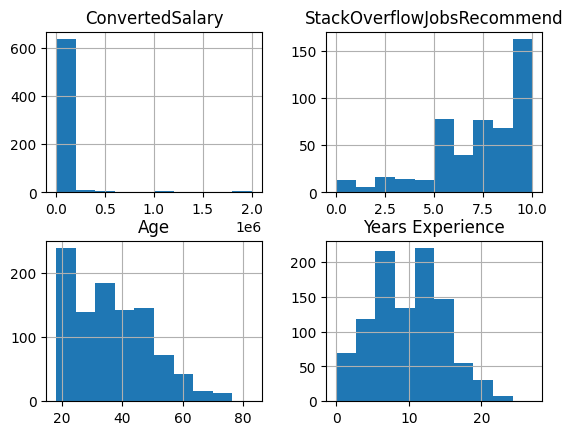

In [12]:
# Create a histogram
so_numeric_df.hist()
plt.show()

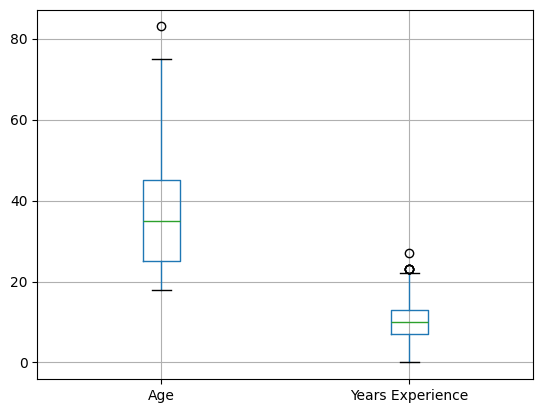

In [13]:
# Create a boxplot of two columns
so_numeric_df[['Age', 'Years Experience']].boxplot()
plt.show()

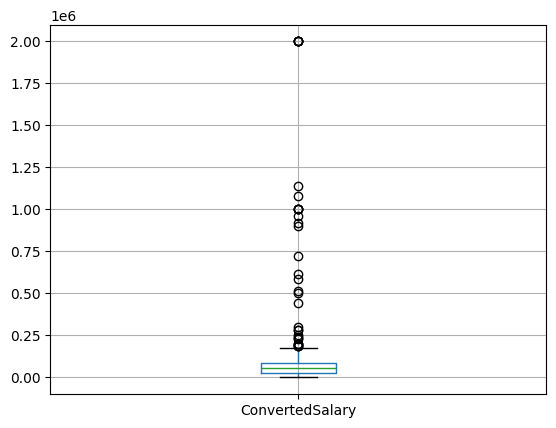

In [14]:
# Create a boxplot of ConvertedSalary
so_numeric_df[['ConvertedSalary']].boxplot()
plt.show()

**What does your data look like? (II)**  
In the previous exercise you looked at the distribution of individual columns. While this is a good start, a more detailed view of how different features interact with each other may be useful as this can impact your decision on what to transform and how.

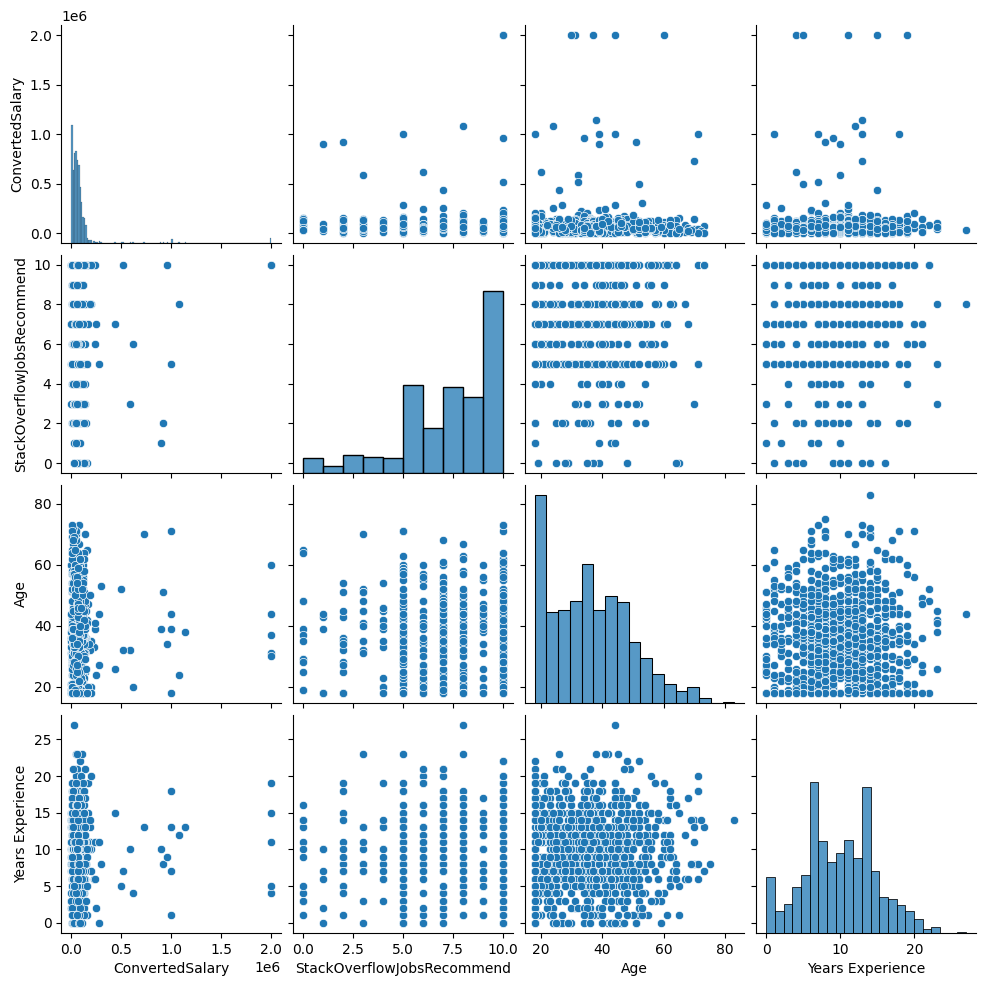

In [15]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Plot pairwise relationships
sns.pairplot(so_numeric_df)

# Show plot
plt.show()

In [17]:
# Print summary statistics
print(so_numeric_df.describe())

#  understanding these summary statistics of a column can be very valuable when deciding what transformations are necessary.

       ConvertedSalary  StackOverflowJobsRecommend         Age  \
count     6.650000e+02                  487.000000  999.000000   
mean      9.256517e+04                    7.061602   36.003003   
std       2.091344e+05                    2.621591   13.255127   
min       0.000000e+00                    0.000000   18.000000   
25%       2.755000e+04                    5.000000   25.000000   
50%       5.556200e+04                    7.000000   35.000000   
75%       8.823800e+04                   10.000000   45.000000   
max       2.000000e+06                   10.000000   83.000000   

       Years Experience  
count        999.000000  
mean           9.961962  
std            4.878129  
min            0.000000  
25%            7.000000  
50%           10.000000  
75%           13.000000  
max           27.000000  


**When don't you have to transform your data?**  
While making sure that all of your data is on the same scale is advisable for most analyses, for which of the following machine learning models is normalizing data not always necessary?

- K-Means


- --Decision Trees


- Linear Regression


- K-nearest neighbors

As decision trees split along a singular point, they do not require all the columns to be on the same scale.

### Scaling and transformations

**Normalization**  
As discussed in the video, in normalization you linearly scale the entire column between 0 and 1, with 0 corresponding with the lowest value in the column, and 1 with the largest.
When using scikit-learn (the most commonly used machine learning library in Python) you can use a MinMaxScaler to apply normalization. (It is called this as it scales your values between a minimum and maximum value.)

In [18]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
MM_scaler = MinMaxScaler()

# Fit MM_scaler to the data
MM_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_MM'] = MM_scaler.transform(so_numeric_df[['Age']])

# Compare the origional and transformed column
print(so_numeric_df[['Age_MM', 'Age']].head())

# Did you notice that all values have been scaled between 0 and 1?

     Age_MM  Age
0  0.046154   21
1  0.307692   38
2  0.415385   45
3  0.430769   46
4  0.323077   39


/tmp/ipython-input-18-2893398012.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  so_numeric_df['Age_MM'] = MM_scaler.transform(so_numeric_df[['Age']])


In [20]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
SS_scaler = StandardScaler()

# Fit SS_scaler to the data
SS_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_SS'] = SS_scaler.transform(so_numeric_df[['Age']])

# Compare the origional and transformed column
print(so_numeric_df[['Age_SS', 'Age']].head())

# you can see that the values have been scaled linearly, but not between set values.

     Age_SS  Age
0 -1.132431   21
1  0.150734   38
2  0.679096   45
3  0.754576   46
4  0.226214   39


/tmp/ipython-input-20-1130331447.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  so_numeric_df['Age_SS'] = SS_scaler.transform(so_numeric_df[['Age']])


**Log transformation**  
In the previous exercises you scaled the data linearly, which will not affect the data's shape. This works great if your data is normally distributed (or closely normally distributed), an assumption that a lot of machine learning models make. Sometimes you will work with data that closely conforms to normality, e.g the height or weight of a population. On the other hand, many variables in the real world do not follow this pattern e.g, wages or age of a population. In this exercise you will use a log transform on the ConvertedSalary column in the so_numeric_df DataFrame as it has a large amount of its data centered around the lower values, but contains very high values also. These distributions are said to have a long right tail.

/tmp/ipython-input-22-3681546005.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  so_numeric_df['ConvertedSalary_LG'] = pow_trans.transform(so_numeric_df[['ConvertedSalary']])


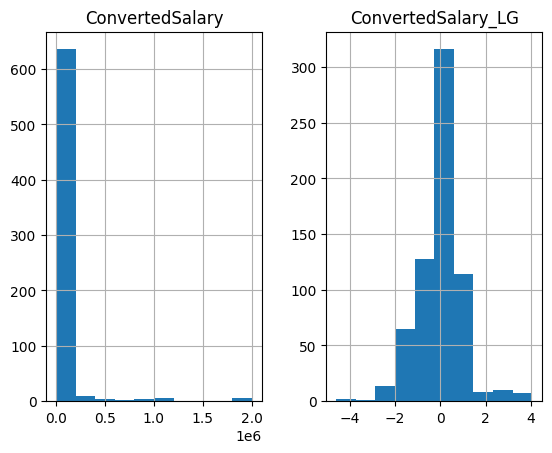

In [22]:
# Import PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
pow_trans.fit(so_numeric_df[['ConvertedSalary']])

# Apply the power transform to the data
so_numeric_df['ConvertedSalary_LG'] = pow_trans.transform(so_numeric_df[['ConvertedSalary']])

# Plot the data before and after the transformation
so_numeric_df[['ConvertedSalary', 'ConvertedSalary_LG']].hist()
plt.show()

# Did you notice the change in the shape of the distribution? ConvertedSalary_LG column looks much more normal than the original ConvertedSalary column.

**When can you use normalization?**  
When could you use normalization (MinMaxScaler) when working with a dataset?

-?
When you know the the data has a strict upper and lower bound.

### Removing Outliers

**Percentage based outlier removal**  
One way to ensure a small portion of data is not having an overly adverse effect is by removing a certain percentage of the largest and/or smallest values in the column. This can be achieved by finding the relevant quantile and trimming the data using it with a mask. This approach is particularly useful if you are concerned that the highest values in your dataset should be avoided. When using this approach, you must remember that even if there are no outliers, this will still remove the same top N percentage from the dataset.

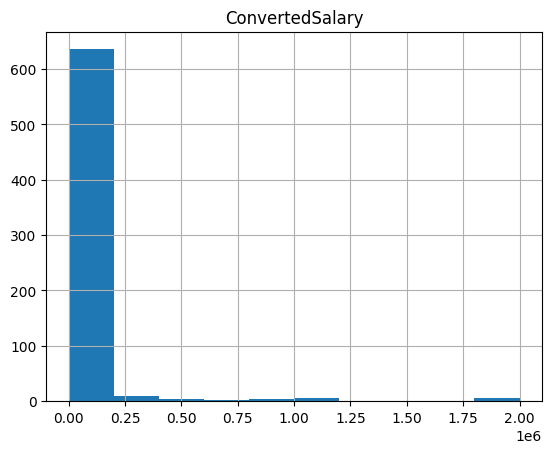

<Figure size 640x480 with 0 Axes>

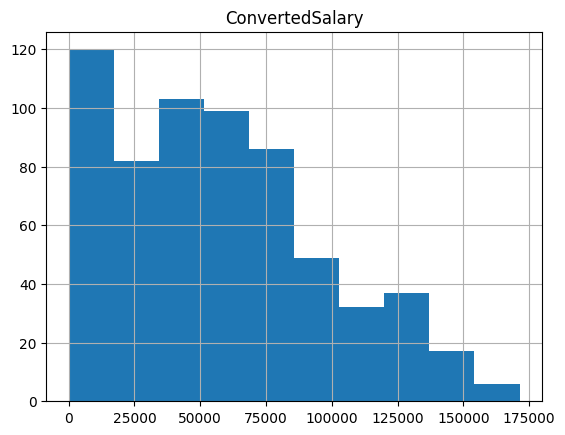

In [23]:
# Find the 95th quantile
quantile = so_numeric_df['ConvertedSalary'].quantile (0.95)

# Trim the outliers
trimmed_df = so_numeric_df[so_numeric_df['ConvertedSalary'] < quantile]

# The original histogram
so_numeric_df[['ConvertedSalary']].hist()
plt.show()
plt.clf()

# The trimmed histogram
trimmed_df[['ConvertedSalary']].hist()
plt.show()

**Statistical outlier removal**  
While removing the top N% of your data is useful for ensuring that very spurious points are removed, it does have the disadvantage of always removing the same proportion of points, even if the data is correct. A commonly used alternative approach is to remove data that sits further than three standard deviations from the mean. You can implement this by first calculating the mean and standard deviation of the relevant column to find upper and lower bounds, and applying these bounds as a mask to the DataFrame. This method ensures that only data that is genuinely different from the rest is removed, and will remove fewer points if the data is close together.

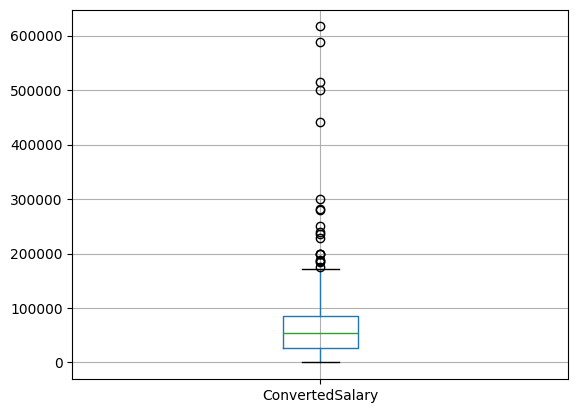

In [24]:
# Find the mean and standard dev
std = so_numeric_df['ConvertedSalary'].std()
mean = so_numeric_df['ConvertedSalary'].mean()

# Calculate the cutoff
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off

# Trim the outliers
trimmed_df = so_numeric_df[(so_numeric_df['ConvertedSalary'] < upper)                          & (so_numeric_df['ConvertedSalary'] > lower)]

# The trimmed box plot
trimmed_df[['ConvertedSalary']].boxplot()
plt.show()

### **Scaling and transforming new data**  

**Train and testing transformations (I)**  
So far you have created scalers based on a column, and then applied the scaler to the same data that it was trained on. When creating machine learning models you will generally build your models on historic data (train set) and apply your model to new unseen data (test set). In these cases you will need to ensure that the same scaling is being applied to both the training and test data.
To do this in practice you train the scaler on the train set, and keep the trained scaler to apply it to the test set. You should never retrain a scaler on the test set.

For this exercise and the next, we split the so_numeric_df DataFrame into train (so_train_numeric) and test (so_test_numeric) sets.

In [26]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
so_train_numeric, so_test_numeric = train_test_split(so_numeric_df, test_size=0.2, random_state=42)

# Apply a standard scaler to the data
SS_scaler = StandardScaler()

# Fit the standard scaler to the data
SS_scaler.fit(so_train_numeric[['Age']])

# Transform the test data using the fitted scaler
so_test_numeric['Age_ss'] = SS_scaler.transform(so_test_numeric[['Age']])
print(so_test_numeric[['Age', 'Age_ss']].head())

# Data leakage is one of the most common mistakes data scientists tend to make, and I hope that you won't!

     Age    Age_ss
453   29 -0.539044
793   25 -0.840126
209   46  0.740550
309   18 -1.367018
740   26 -0.764855


**Train and testing transformations (II)**  
Similar to applying the same scaler to both your training and test sets, if you have removed outliers from the train set, you probably want to do the same on the test set as well. Once again you should ensure that you use the thresholds calculated only from the train set to remove outliers from the test set.

Similar to the last exercise, we split the so_numeric_df DataFrame into train (so_train_numeric) and test (so_test_numeric) sets.

In [27]:
train_std = so_train_numeric['ConvertedSalary'].std()
train_mean = so_train_numeric['ConvertedSalary'].mean()

cut_off = train_std * 3
train_lower, train_upper = train_mean - cut_off, train_mean + cut_off

# Trim the test DataFrame
trimmed_df = so_test_numeric[(so_test_numeric['ConvertedSalary'] < train_upper) \
                             & (so_test_numeric['ConvertedSalary'] > train_lower)]